# World Happiness Report Analysis

##### By: Peter Henry

##### URL: https://www.kaggle.com/datasets/unsdsn/world-happiness

# Intro:
In this analysis, we examine the Kaggle dataset titled "World Happiness Report," which records happiness-related metrics for 155 countries. The happiness scores and rankings are derived from the Gallup World Poll, with the scores based on responses to a primary life evaluation question. This question, known as the Cantril Ladder, asks respondents to imagine a ladder where 10 represents the best possible life and 0 represents the worst possible life. Participants rate their current lives on this scale.

The dataset provides scores from nationally representative samples for the years 2013 to 2016, adjusted using Gallup's weighting system to ensure accurate representation. Following the happiness score, the dataset includes six factors—economic production, social support, life expectancy, freedom, absence of corruption, and generosity—that contribute to higher life evaluations in each country compared to Dystopia, a hypothetical country with the world’s lowest national averages for these factors. While these six factors do not affect the total happiness score, they offer insight into why some countries rank higher than others.

Features in this dataset include the following:
1. Country: The country being analyzed.
2. Region: The geographical region in which the country is located.
3. Happiness Rank: The ranking of the country based on its happiness score relative to other countries.
4. Happiness Score: The overall score representing the country's happiness level, derived from survey responses to the Cantril Ladder question, where individuals rate their lives on a scale from 0 (worst possible life) to 10 (best possible life).
5. Economy (GDP per Capita): A measure of the economic output per person in the country, reflecting its wealth and economic health.
6. Social Support: The extent to which individuals feel supported by their social network, including friends, family, and community.
7. Healthy life expectancy: The average number of years a person can expect to live in good health, based on current health conditions in the country.
8. Freedom to make life choices: A measure of individuals' perceived freedom to make decisions about their lives, such as personal and professional choices.
9. Perceptions of corruption: A measure of the perceived level of corruption in the government and businesses within the country.
10. Generosity: A measure of how charitable and giving the population is, based on donations and acts of kindness.
11. Dystopia Residual: A hypothetical measure used as a benchmark to compare each country's performance. It represents the gap between the worst possible life conditions (Dystopia) and the actual conditions in the country.
12. Year: The year the data was collected for that country.

Libraries for Analyzation

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess

In [2]:
def combine_world_happiness_data(directory):
    """
    Combines multiple World Happiness CSV files into a single dataframe.
    
    Params:
    directory (str): The directory path where the CSV files are located.
    
    Returns:
    pd.DataFrame: A combined dataframe with standardized columns and a year column.
    """
    # Define standard column names for unification
    standard_columns = {
        'Country': 'Country',
        'Region': 'Region',
        'Happiness Rank': 'Happiness Rank',
        'Happiness Score': 'Happiness Score',
        'Standard Error': 'Standard Error',
        'Economy (GDP per Capita)': 'Economy (GDP per Capita)',
        'Family': 'Social support',
        'Health (Life Expectancy)': 'Healthy life expectancy',
        'Freedom': 'Freedom to make life choices',
        'Trust (Government Corruption)': 'Perceptions of corruption',
        'Generosity': 'Generosity',
        'Dystopia Residual': 'Dystopia Residual',
        'Lower Confidence Interval': 'Lower Confidence Interval',
        'Upper Confidence Interval': 'Upper Confidence Interval',
        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
        'Health..Life.Expectancy.': 'Healthy life expectancy',
        'Trust..Government.Corruption.': 'Perceptions of corruption',
        'Overall rank': 'Happiness Rank',
        'Country or region': 'Country',
        'Score': 'Happiness Score',
        'GDP per capita': 'Economy (GDP per Capita)',
        'Social support': 'Social support',
    }

    # Automatically find all CSV files in the specified directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Extract the year from the file name and load each file
    dataframes = {}
    for file_name in csv_files:
        year = file_name.split('.')[0]  # Extract year from filename
        file_path = os.path.join(directory, file_name)
        df = pd.read_csv(file_path)
        df.rename(columns=standard_columns, inplace=True)
        df['Year'] = year  # Add year column
        # Add missing columns with NaN values
        for col in standard_columns.values():
            if col not in df.columns:
                df[col] = pd.NA
        dataframes[year] = df

    combined_df = pd.concat(dataframes.values(), ignore_index=True)

    return combined_df

directory = r"C:\Users\peter\OneDrive\Documents\Portfolio - Data Science\Extracurricular\Datasets\World Happiness"

combined_df = combine_world_happiness_data(directory)

C:\Users\peter\AppData\Local\Temp\ipykernel_5572\3238306396.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes.values(), ignore_index=True)


Lets look to see what has been created

In [3]:
print(combined_df.head(10))
print(combined_df.tail(10))

       Country                     Region Happiness Rank  Happiness Score  \
0  Switzerland             Western Europe              1            7.587   
1      Iceland             Western Europe              2            7.561   
2      Denmark             Western Europe              3            7.527   
3       Norway             Western Europe              4            7.522   
4       Canada              North America              5            7.427   
5      Finland             Western Europe              6            7.406   
6  Netherlands             Western Europe              7            7.378   
7       Sweden             Western Europe              8            7.364   
8  New Zealand  Australia and New Zealand              9            7.286   
9    Australia  Australia and New Zealand             10            7.284   

   Standard Error  Economy (GDP per Capita)  Social support  \
0         0.03411                   1.39651         1.34951   
1         0.04884         

## Next Steps
- Looks like there are some columns I do not want such as 'Standard Error', Lower Confidence Interval', 'Upper Confidence Interval', 'Whisker.high', 'Whisker.low'.
- There are some columns that need merging like Happiness.Rank, Happiness.Score, Dytopia.Residual.
- Finally, I want 'Region to be available for all years so we will need to come up with a solution on how to add those regions in dependant on what country it is.

In [4]:
columns_to_drop = [
    'Standard Error',
    'Lower Confidence Interval',
    'Upper Confidence Interval',
    'Whisker.high',
    'Whisker.low'
    ]

# Source column > Target column
column_pairs_to_merge = [
    ('Happiness.Rank', 'Happiness Rank'),
    ('Happiness.Score','Happiness Score'),
    ('Dystopia.Residual','Dystopia Residual')
    ]

def merge_multiple_columns(df, column_drop, column_pairs):
    """
    Merge values from multiple source columns into target columns and drop source columns.

    Params: 
    - df(pd.DataFrame): pd df
    - column_pairs(list of tuples): list of tuples containing two column names (source > target).
                                    Source column will be merged into target column 
    
    Returns:
    - pd.DataFrame: Updated dataframe with merged columns
    """
    df.drop(column_drop, axis=1, inplace=True)

    for source_col, target_col in column_pairs:
        df[target_col] = df[target_col].combine_first(df[source_col])

    df.drop(columns=[source_col for source_col, target_col in column_pairs], inplace=True)
    
    return df


combined_df = merge_multiple_columns(combined_df, columns_to_drop, column_pairs_to_merge)

In [5]:
print(combined_df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')


Looks like we dropped and merged the data successfully! Now lets add those regions to the countries. Also I want to add a unique identifier to the country so we can identify a country based on an ID

In [6]:
# Checking to see if 'Year' is numeric or a string
print(combined_df['Year'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 782 entries, 0 to 781
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
782 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


In [7]:
def add_country_id(df):
    country_id_mapping = pd.factorize(df['Country'])[0] + 1 
    df['Country ID'] = country_id_mapping
    return df

def create_region_mapping(df_2015): # using year 2015 due to having the necessary information
    region_mapping = df_2015.set_index('Country')['Region'].to_dict()
    return region_mapping

def fill_missing_regions(df, region_mapping):
    df['Region'] = df['Region'].combine_first(df['Country'].map(region_mapping))
    return df

df_2015 = combined_df[combined_df['Year'] == '2015']
region_mapping = create_region_mapping(df_2015)

combined_df = fill_missing_regions(combined_df, region_mapping)
combined_df = add_country_id(combined_df)

In [8]:
print(combined_df[combined_df['Country'] == 'Switzerland'].head())

         Country          Region Happiness Rank  Happiness Score  \
0    Switzerland  Western Europe              1            7.587   
159  Switzerland  Western Europe              2            7.509   
318  Switzerland  Western Europe            4.0            7.494   
474  Switzerland  Western Europe              5            7.487   
631  Switzerland  Western Europe              6            7.480   

     Economy (GDP per Capita)  Social support  Healthy life expectancy  \
0                     1.39651        1.349510                 0.941430   
159                   1.52733        1.145240                 0.863030   
318                   1.56498        1.516912                 0.858131   
474                   1.42000        1.549000                 0.927000   
631                   1.45200        1.526000                 1.052000   

     Freedom to make life choices  Perceptions of corruption  Generosity  \
0                        0.665570                   0.419780    0.2967

Great! The unique ID for each country worked! Now lets check to see how regions went.
- First thing to look at is if there are NA values

In [9]:
#Checking NA values for Region. These are countries that were not part of 2015
combined_df.isna().sum()

Country                           0
Region                           19
Happiness Rank                    0
Happiness Score                   0
Economy (GDP per Capita)          0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         1
Generosity                        0
Dystopia Residual               312
Year                              0
Country ID                        0
dtype: int64

In [10]:
# Looking at the Countries and Country IDs that have NA values 
missing_regions = combined_df[combined_df['Region'].isna()][['Country','Country ID']].drop_duplicates()
print(missing_regions)

                      Country  Country ID
347  Taiwan Province of China         165
364                    Belize         160
385   Hong Kong S.A.R., China         166
407                   Somalia         161
425                   Namibia         163
461               South Sudan         164
507         Trinidad & Tobago         167
527           Northern Cyprus         168
709           North Macedonia         169
745                    Gambia         170


In [11]:
# Looking at the regions to add to each country in the above missing_regions
regions = combined_df['Region'].drop_duplicates().dropna()
print(f"Number of Regions: {regions.count()}\n\nRegions are:\n{regions}")

Number of Regions: 10

Regions are:
0                      Western Europe
4                       North America
8           Australia and New Zealand
10    Middle East and Northern Africa
11        Latin America and Caribbean
23                  Southeastern Asia
30         Central and Eastern Europe
37                       Eastern Asia
70                 Sub-Saharan Africa
78                      Southern Asia
Name: Region, dtype: object


Now that we have the countries with missing regions, and we have the regions we can apply our knowledge to apply the region to the country. Below is a dictionary related to that.

In [12]:
# Key is Country ID, value is applicable region
region_mapping_for_missing = {
    165: 'Eastern Asia',
    160: 'Latin America and Caribbean',
    166: 'Eastern Asia',
    161: 'Sub-Saharan Africa',
    163: 'Sub-Saharan Africa',
    164: 'Sub-Saharan Africa',
    167: 'Latin America and Caribbean',
    168: 'Middle East and Northern Africa',
    169: 'Central and Eastern Europe',
    170: 'Sub-Saharan Africa'
}

In [13]:
def add_missing_region(df, missing_regions):
    df['Region'] = df.apply(
        lambda row: region_mapping_for_missing[row['Country ID']]
            if pd.isna(row['Region']) and row['Country ID'] in region_mapping_for_missing
            else row['Region'],
        axis=1
    )
    return df

combined_df = add_missing_region(combined_df, region_mapping_for_missing)

In [14]:
print(f" NA values in Region: {combined_df['Region'].isna().sum()}")

 NA values in Region: 0


Yay we were able to apply regions based on the Country ID. Now lets look at the other NA values

In [15]:
combined_df.isna().sum()

Country                           0
Region                            0
Happiness Rank                    0
Happiness Score                   0
Economy (GDP per Capita)          0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         1
Generosity                        0
Dystopia Residual               312
Year                              0
Country ID                        0
dtype: int64

Dystopia Residual is almost a nonsensical value and it a feauture engineering example already entered into the dataset. In this dataset the dystopia value is supposed to represent the absolute minimum value for any feature. 

The values that are missing can be calculated.
- To calculate:
    - round(Happiness score - sum(Economy, Social support, Healthy Life expect, Freedom, Perception of corruption, Generosity),3)

Lets Calculate and add into your df. Also, lets take care of the one perception of corruption. We will look further into what we should do for the 1 Na value

In [16]:
def fill_missing_dystopia(df):
    df['Dystopia Residual'] = df.apply(
        lambda row: round(row['Happiness Score'] - sum([
            row['Economy (GDP per Capita)'],
            row['Social support'],
            row['Healthy life expectancy'],
            row['Freedom to make life choices'],
            row['Perceptions of corruption'] if not pd.isna(row['Perceptions of corruption']) else 0,
            row['Generosity']
        ]),3) if pd.isna(row['Dystopia Residual']) else row['Dystopia Residual'], axis=1
    )
    return df

combined_df = fill_missing_dystopia(combined_df)

In [17]:
print(combined_df.isna().sum())

Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
Economy (GDP per Capita)        0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       1
Generosity                      0
Dystopia Residual               0
Year                            0
Country ID                      0
dtype: int64


In [18]:
# Looking at the original missing values based on the Country ID
missing_country_ids = [165, 160, 166, 161, 163, 164, 167, 168, 169, 170]
filtered_df = combined_df[combined_df['Country ID'].isin(missing_country_ids)]
print(filtered_df[['Country','Region']].drop_duplicates())

                      Country                           Region
209                    Belize      Latin America and Caribbean
233                   Somalia               Sub-Saharan Africa
270                   Namibia               Sub-Saharan Africa
300               South Sudan               Sub-Saharan Africa
347  Taiwan Province of China                     Eastern Asia
385   Hong Kong S.A.R., China                     Eastern Asia
507         Trinidad & Tobago      Latin America and Caribbean
527           Northern Cyprus  Middle East and Northern Africa
709           North Macedonia       Central and Eastern Europe
745                    Gambia               Sub-Saharan Africa


Great! All the missing regions have been filled with what we wanted!!! Now to look at the pesky Prection of corruption NA value

In [19]:
print(f"Below is the row with the missing value for Perception of Corruption:\n\n{combined_df[combined_df['Perceptions of corruption'].isna()]}")

Below is the row with the missing value for Perception of Corruption:

                  Country                           Region Happiness Rank  \
489  United Arab Emirates  Middle East and Northern Africa             20   

     Happiness Score  Economy (GDP per Capita)  Social support  \
489            6.774                     2.096           0.776   

     Healthy life expectancy  Freedom to make life choices  \
489                     0.67                         0.284   

     Perceptions of corruption  Generosity  Dystopia Residual  Year  \
489                        NaN       0.186              2.762  2018   

     Country ID  
489          20  


Lets see if Perception of Corruption is available for the UAE in other years. If so lets take the average of all the available years and add that into the 2018 year. 

In [20]:
print(combined_df[combined_df['Country ID'] == 20][['Country ID','Year','Perceptions of corruption']].dropna())

     Country ID  Year  Perceptions of corruption
19           20  2015                    0.38583
185          20  2016                    0.35561
335          20  2017                    0.32449
646          20  2019                    0.18200


So we can see that 2018 is the only year missing. Lets take the average of all the other years. 2019 looks low but lets assume that is an odd year out since we do not have any more information. We will take the average of the years 2015, 2016, and 2017 without 2019.

In [21]:
# some simple commands to get the one value out
uae_data = combined_df[combined_df['Country ID'] == 20][['Year','Perceptions of corruption']].dropna()
uae_avg = uae_data[uae_data['Year'].isin(['2015','2016','2017'])]['Perceptions of corruption'].mean()
combined_df.loc[(combined_df['Country ID'] == 20) & (combined_df['Year'] == '2018'), 'Perceptions of corruption'] = round(uae_avg,5)

print(combined_df[combined_df['Country ID'] == 20][['Country ID','Year','Perceptions of corruption']])

     Country ID  Year  Perceptions of corruption
19           20  2015                    0.38583
185          20  2016                    0.35561
335          20  2017                    0.32449
489          20  2018                    0.35531
646          20  2019                    0.18200


The Average has been added in. 

## Now lets look at some descriptive statistics to see if there is anything off.

In [22]:
print(combined_df.describe())

       Happiness Score  Economy (GDP per Capita)  Social support  \
count       782.000000                782.000000      782.000000   
mean          5.379018                  0.916047        1.078392   
std           1.127456                  0.407340        0.329548   
min           2.693000                  0.000000        0.000000   
25%           4.509750                  0.606500        0.869363   
50%           5.322000                  0.982205        1.124735   
75%           6.189500                  1.236187        1.327250   
max           7.769000                  2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  \
count               782.000000                    782.000000   
mean                  0.612416                      0.411091   
std                   0.248309                      0.152880   
min                   0.000000                      0.000000   
25%                   0.440183                      0.309768   
50%

### There are a couple areas that look off.
- Any minimum at 0.000000 look to be off. To me, no country should have a 0 value as that would be considered at or below the dystopia value. 
- So we will probably need to correct the zeros for min and then recalc the Dystopia residual like we did for the 213 missing Dystopia Residual values. Since there is proprietary values for each Dystopia Residual in each row, it is impossible to accurately calculate to the 6th digit place. But we can be accurate to the 3rd digit place. We will round all Dystopia Residual values to the 1000ths decimal place in order to be accurate

Lets start with Economy (GDP per Capita)

In [23]:
# Example of missing values in Economy GDP Per Capita
print(combined_df[combined_df['Economy (GDP per Capita)'] == 0])


                      Country              Region Happiness Rank  \
119          Congo (Kinshasa)  Sub-Saharan Africa            120   
233                   Somalia  Sub-Saharan Africa             76   
469  Central African Republic  Sub-Saharan Africa          155.0   
567                   Somalia  Sub-Saharan Africa             98   
737                   Somalia  Sub-Saharan Africa            112   

     Happiness Score  Economy (GDP per Capita)  Social support  \
119            4.517                       0.0         1.00120   
233            5.440                       0.0         0.33613   
469            2.693                       0.0         0.00000   
567            4.982                       0.0         0.71200   
737            4.668                       0.0         0.69800   

     Healthy life expectancy  Freedom to make life choices  \
119                 0.098060                      0.226050   
233                 0.114660                      0.567780   
469     

In [24]:
# Pulling in the data for any country with 0 in Economy column
combined_df['Economy (GDP per Capita)'] = combined_df['Economy (GDP per Capita)'].astype(float)
zero_gdp_countries = combined_df[combined_df['Economy (GDP per Capita)'] == 0]['Country ID'].unique()
missing_GDP_country_data = combined_df[combined_df['Country ID'].isin(zero_gdp_countries)]
missing_GDP_country_data = missing_GDP_country_data.sort_values(by=['Country ID', 'Year'])
missing_GDP_country_data

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia Residual,Year,Country ID
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.000000,1.001200,0.098060,0.226050,0.076250,0.248340,2.867120,2015,120
282,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,0.056610,0.806760,0.188000,0.156020,0.060750,0.254580,2.749240,2016,120
440,Congo (Kinshasa),Sub-Saharan Africa,126.0,4.280,0.092102,1.229023,0.191407,0.235961,0.060241,0.246456,2.224959,2017,120
601,Congo (Kinshasa),Sub-Saharan Africa,132,4.245,0.069000,1.136000,0.204000,0.312000,0.052000,0.197000,2.275000,2018,120
752,Congo (Kinshasa),Sub-Saharan Africa,127,4.418,0.094000,1.125000,0.357000,0.269000,0.053000,0.212000,2.308000,2019,120
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.078500,0.000000,0.066990,0.488790,0.082890,0.238350,2.722300,2015,148
469,Central African Republic,Sub-Saharan Africa,155.0,2.693,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876,2.066005,2017,148
624,Central African Republic,Sub-Saharan Africa,155,3.083,0.024000,0.000000,0.010000,0.305000,0.038000,0.218000,2.488000,2018,148
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.026000,0.000000,0.105000,0.225000,0.035000,0.235000,2.457000,2019,148
233,Somalia,Sub-Saharan Africa,76,5.440,0.000000,0.336130,0.114660,0.567780,0.311800,0.272250,3.837720,2016,161


In [25]:
def avg_min_values(df):

    columns_to_correct = [
        'Economy (GDP per Capita)', 
        'Social support', 
        'Healthy life expectancy', 
        'Freedom to make life choices', 
        'Perceptions of corruption', 
        'Generosity'
    ]

    for column in columns_to_correct:
        zero_value_countries = df[df[column] == 0]['Country ID'].unique()

        for country_id in zero_value_countries:
            non_zero_values = df[(df['Country ID'] == country_id) & (df[column] != 0)][column]
            avg_value = non_zero_values.mean()
            df.loc[(df['Country ID'] == country_id) & (df[column] == 0), column] = avg_value

    return df

combined_df = avg_min_values(combined_df)  

In [26]:
print(combined_df.describe())

       Happiness Score  Economy (GDP per Capita)  Social support  \
count       782.000000                782.000000      778.000000   
mean          5.379018                  0.916289        1.084457   
std           1.127456                  0.406811        0.319727   
min           2.693000                  0.015300        0.104190   
25%           4.509750                  0.606500        0.871152   
50%           5.322000                  0.982205        1.125000   
75%           6.189500                  1.236187        1.329500   
max           7.769000                  2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  \
count               782.000000                    782.000000   
mean                  0.613125                      0.411822   
std                   0.246714                      0.151334   
min                   0.005565                      0.005890   
25%                   0.440183                      0.309768   
50%

Great! Now the 0 values have been averaged based on that particular Country's additional data points on that particular section.

In [27]:
combined_df.to_csv('cleaned_dataset.csv',index=False)

# EDA

## Descriptive Stats

In [28]:
print(combined_df.describe())

       Happiness Score  Economy (GDP per Capita)  Social support  \
count       782.000000                782.000000      778.000000   
mean          5.379018                  0.916289        1.084457   
std           1.127456                  0.406811        0.319727   
min           2.693000                  0.015300        0.104190   
25%           4.509750                  0.606500        0.871152   
50%           5.322000                  0.982205        1.125000   
75%           6.189500                  1.236187        1.329500   
max           7.769000                  2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  \
count               782.000000                    782.000000   
mean                  0.613125                      0.411822   
std                   0.246714                      0.151334   
min                   0.005565                      0.005890   
25%                   0.440183                      0.309768   
50%

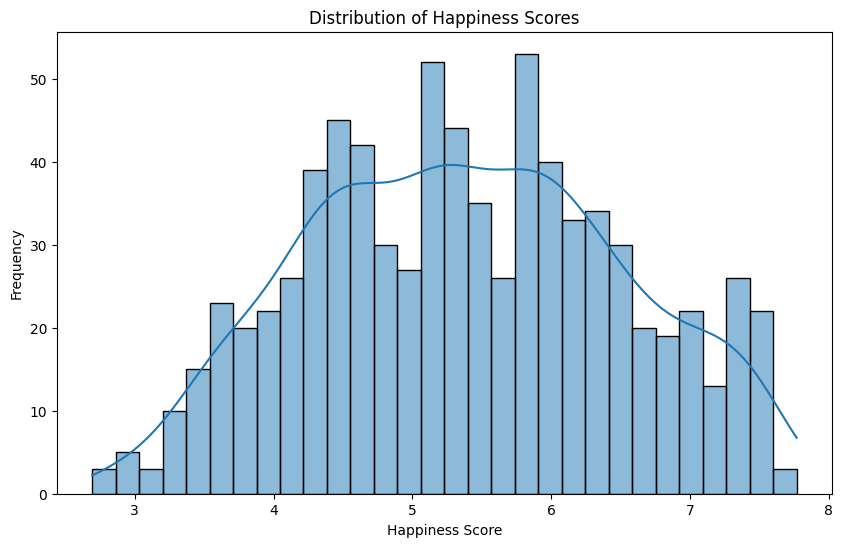

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(combined_df['Happiness Score'], bins=30, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

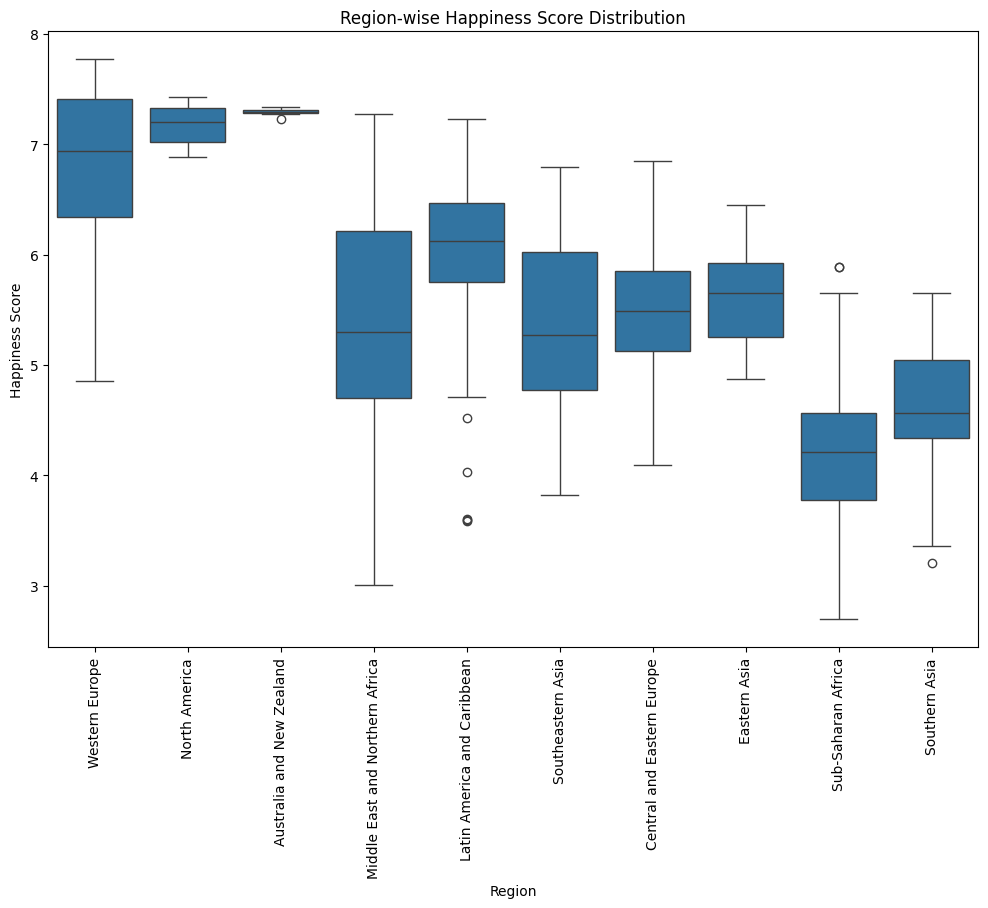

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Region', y='Happiness Score', data=combined_df)
plt.xticks(rotation=90)
plt.title('Region-wise Happiness Score Distribution')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_5572\249285891.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_countries = combined_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Happiness Score')).reset_index(drop=True)['Country'].unique()


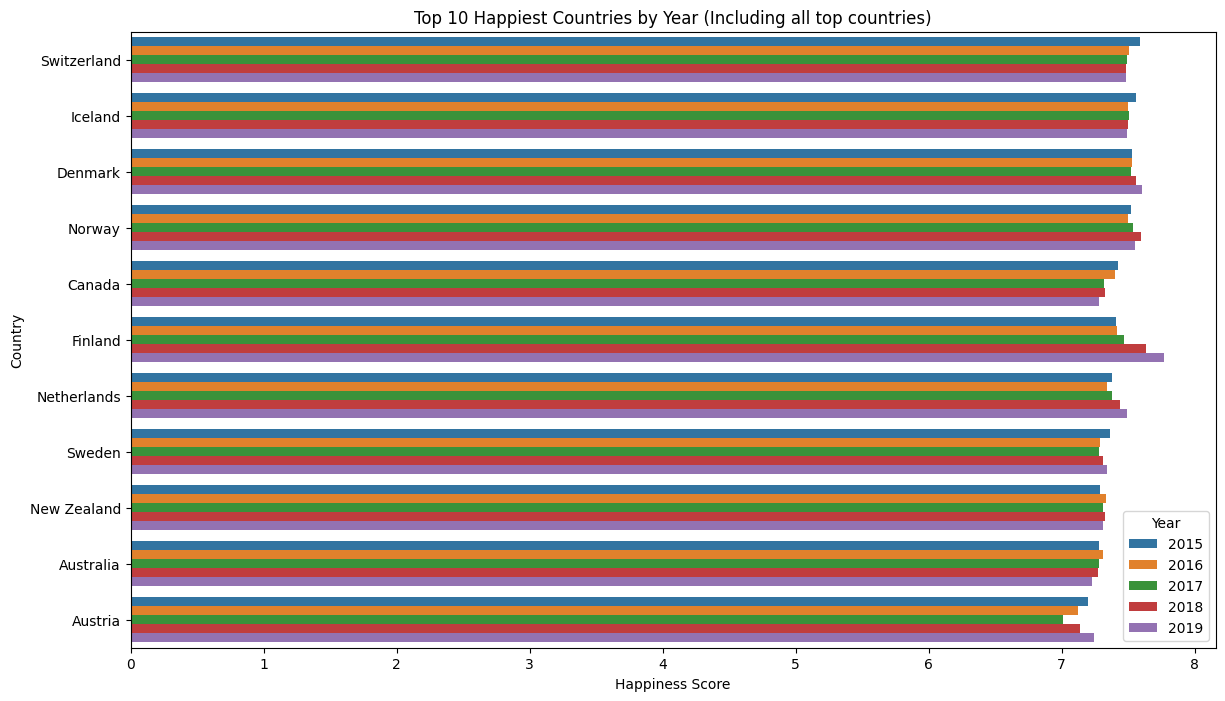

In [37]:
top_10_countries = combined_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Happiness Score')).reset_index(drop=True)['Country'].unique()
filtered_df = combined_df[combined_df['Country'].isin(top_10_countries)]

plt.figure(figsize=(14,8))
sns.barplot(x='Happiness Score', y='Country', hue='Year', data=filtered_df)
plt.title('Top 10 Happiest Countries by Year (Including all top countries)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_5572\2031605635.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10 = combined_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Happiness Score')).reset_index(drop=True)


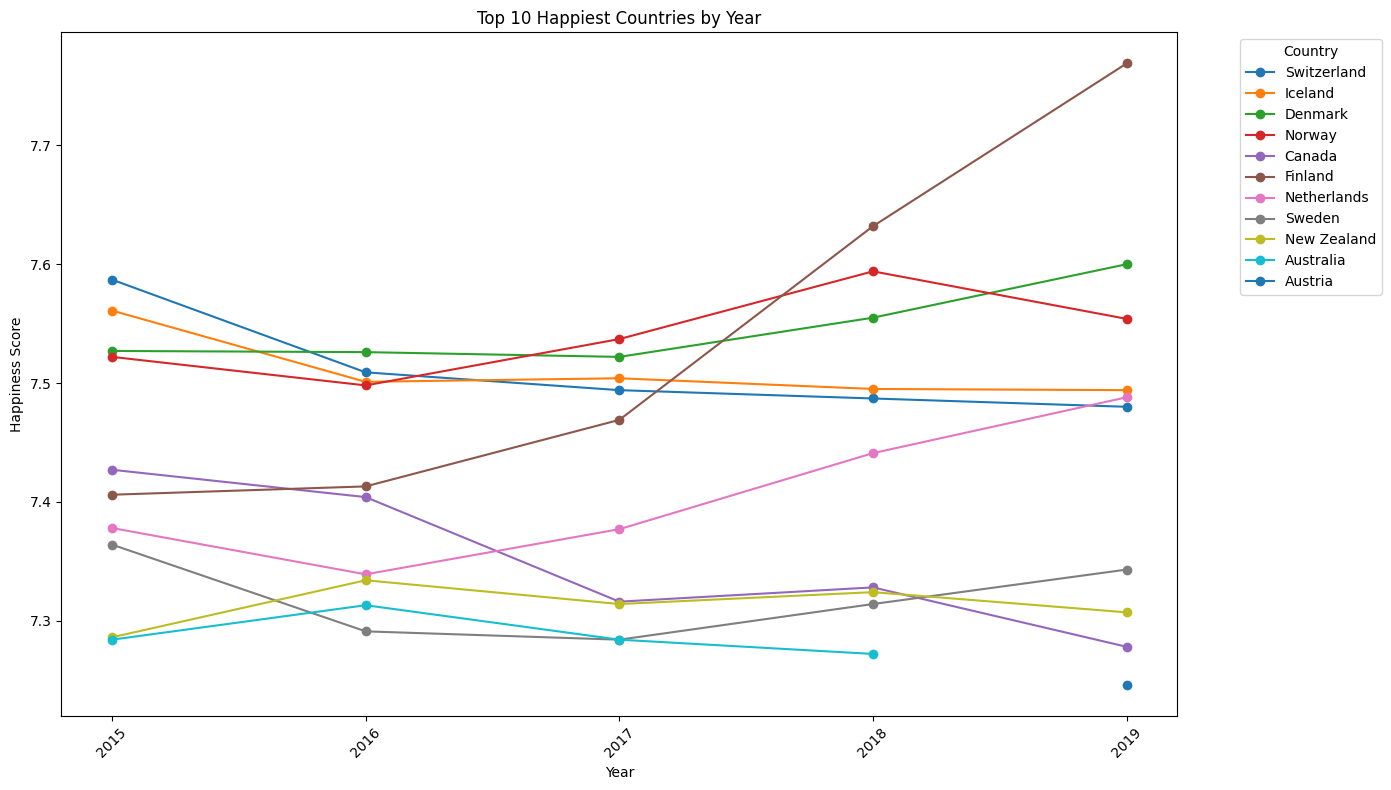

In [32]:
top_10 = combined_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Happiness Score')).reset_index(drop=True)

plt.figure(figsize=(14,8))

for country in top_10['Country'].unique():
    country_data = top_10[top_10['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Score'], marker='o', label=country)

plt.title('Top 10 Happiest Countries by Year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

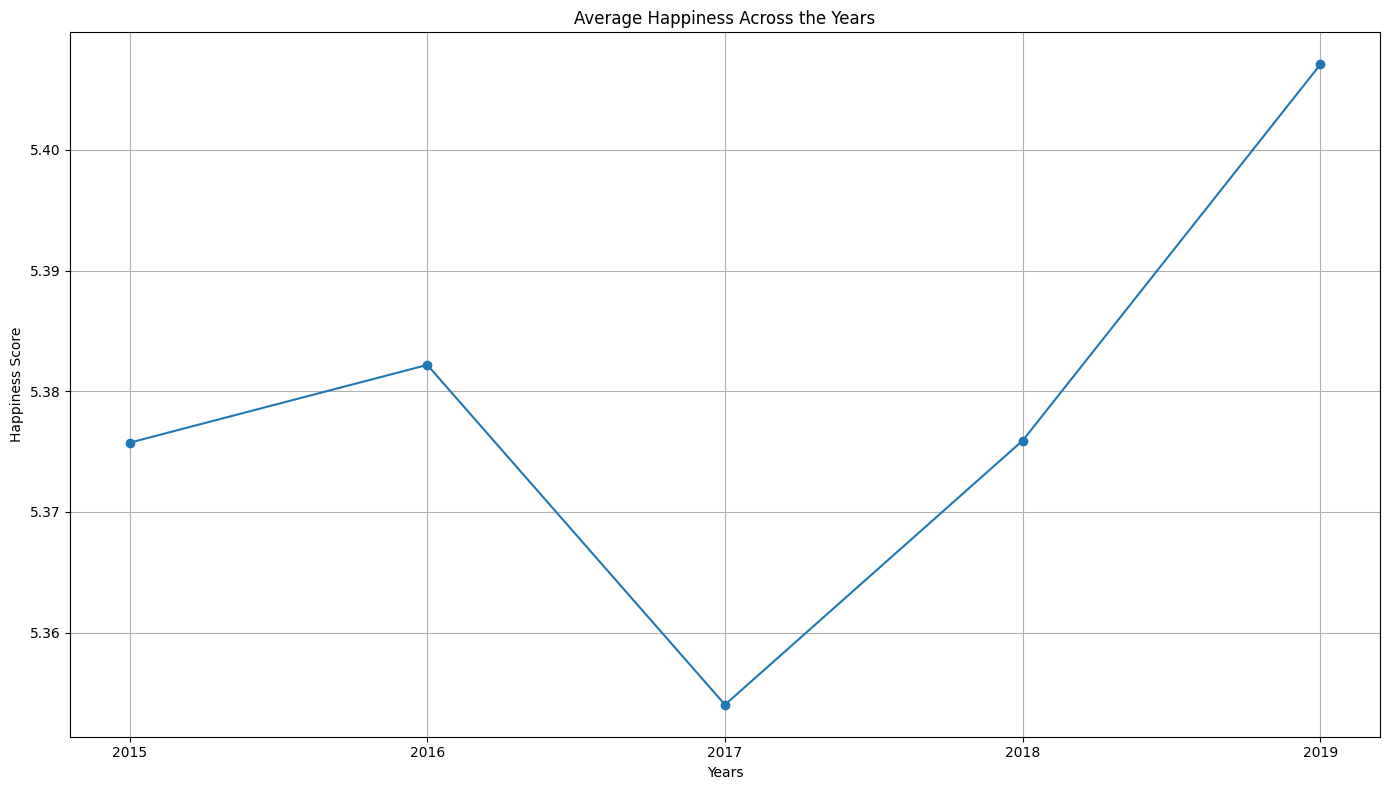

In [33]:
avg_happiness_per_year = combined_df.groupby('Year')['Happiness Score'].mean().reset_index()

plt.figure(figsize=(14,8))
plt.plot(avg_happiness_per_year['Year'], avg_happiness_per_year['Happiness Score'], marker='o')
plt.title('Average Happiness Across the Years')
plt.xlabel('Years')
plt.ylabel('Happiness Score')
plt.grid()
plt.tight_layout()
plt.show()

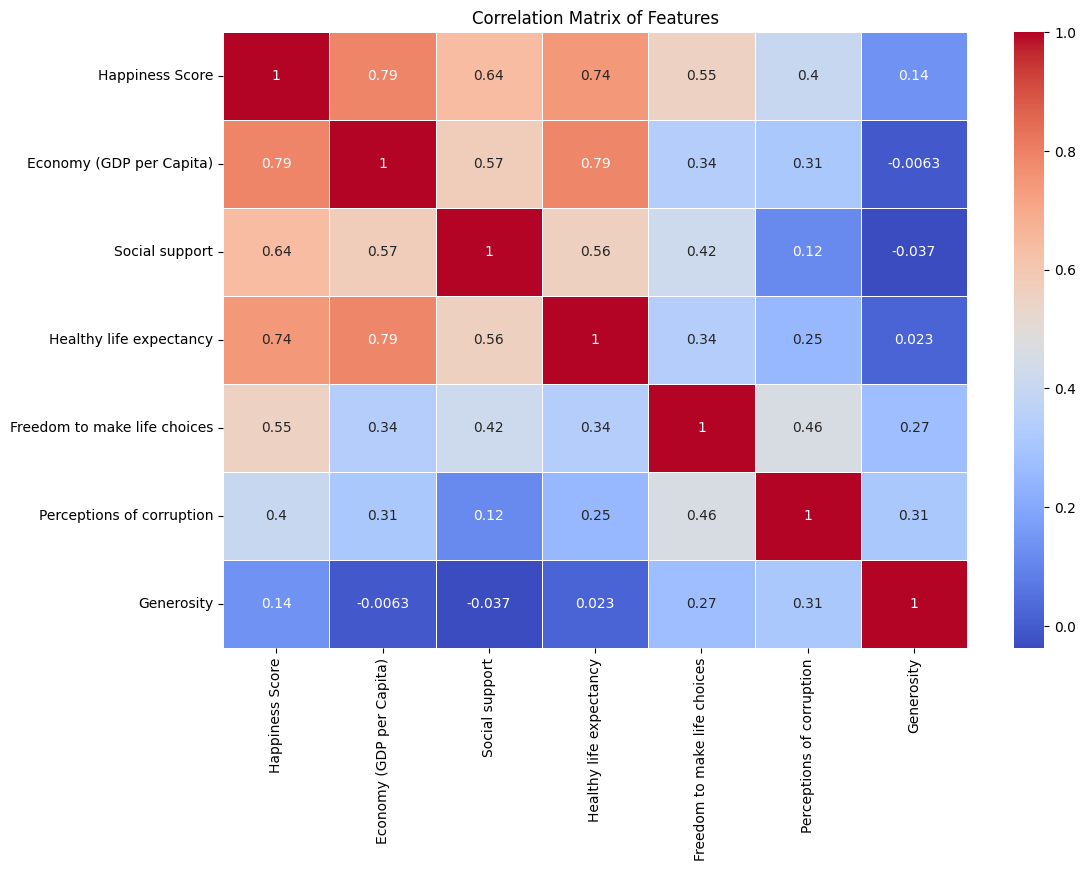

In [34]:
plt.figure(figsize=(12,8))
correlation_matrix = combined_df[['Happiness Score', 'Economy (GDP per Capita)', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

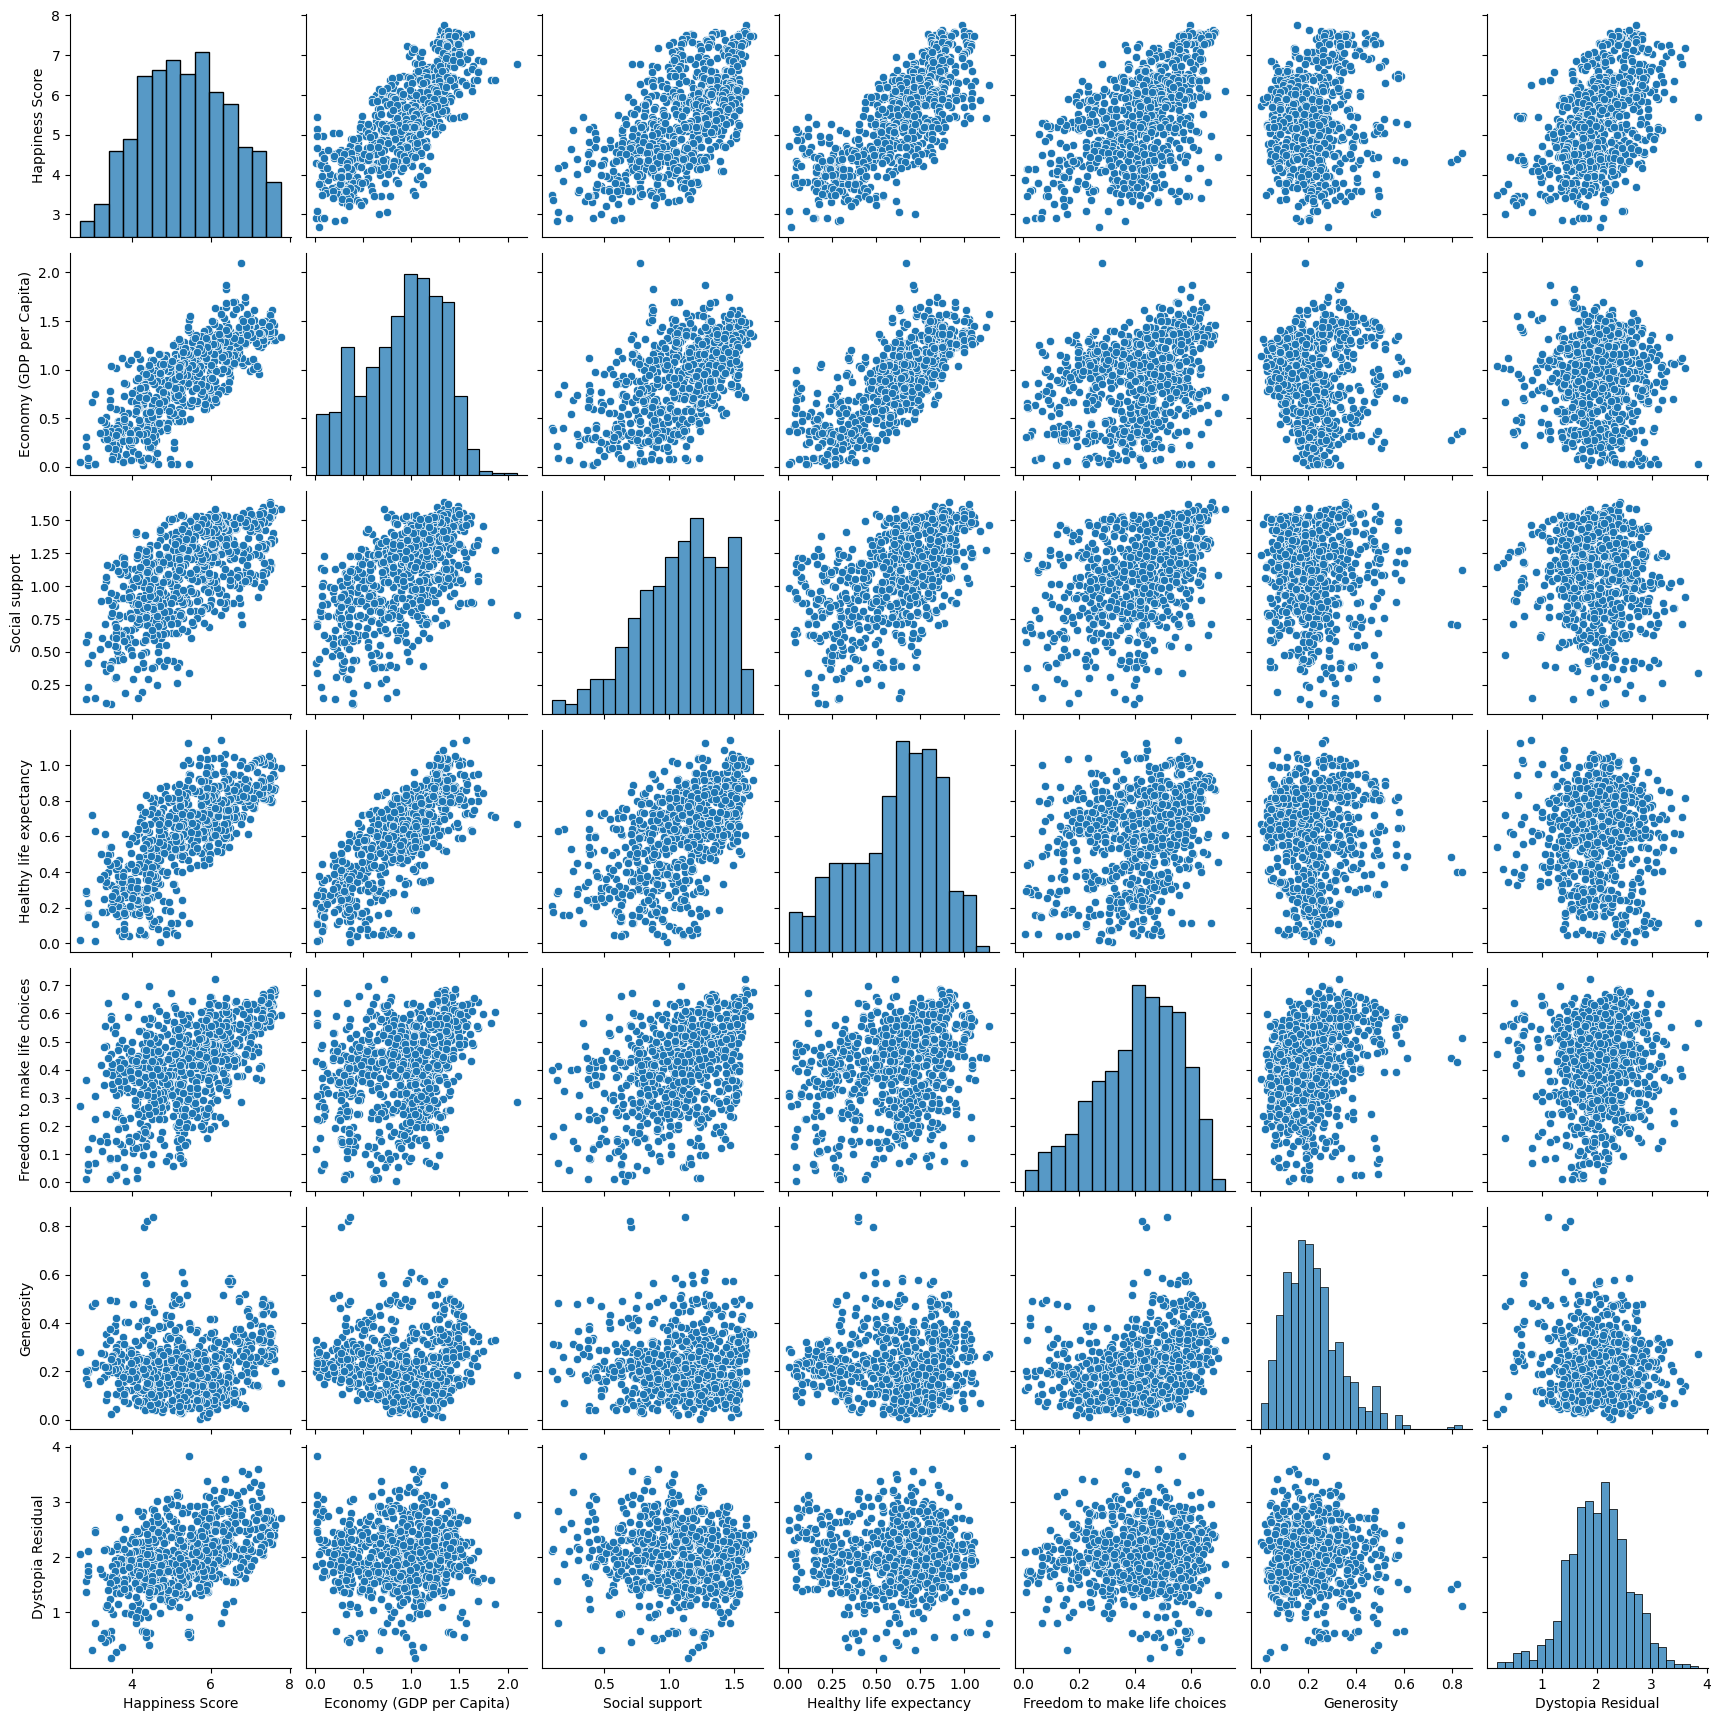

In [35]:
sns.pairplot(combined_df[['Happiness Score', 'Economy (GDP per Capita)', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Dystopia Residual']])
plt.show()

Several plots stand out. Lets enlarge them to see it better

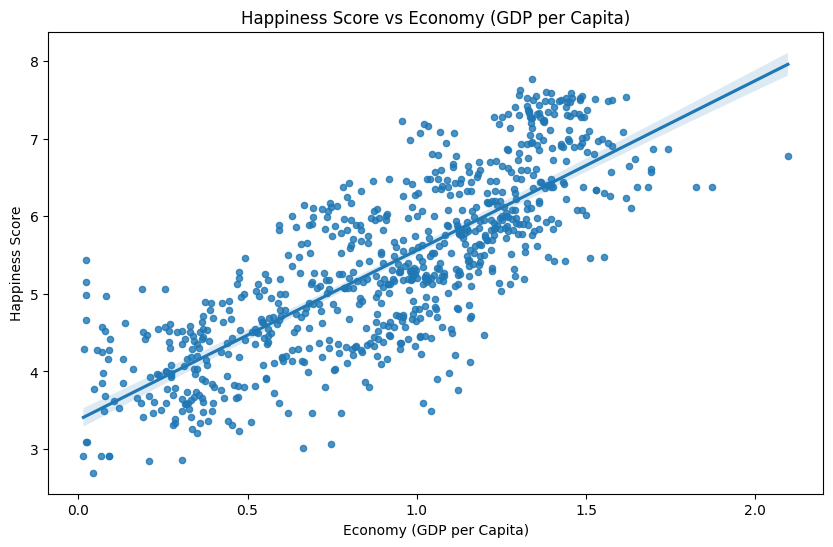

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=combined_df, scatter_kws={'s':20})
plt.title('Happiness Score vs Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

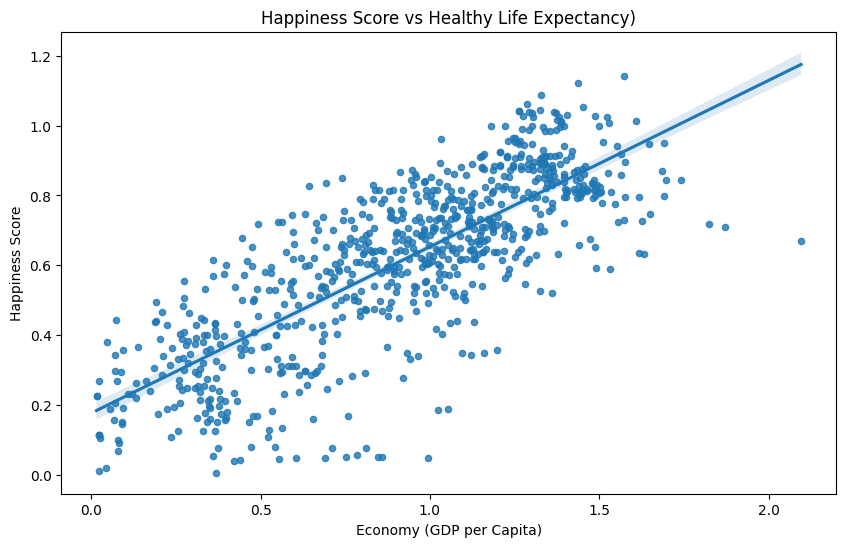

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(x='Economy (GDP per Capita)', y='Healthy life expectancy', data=combined_df, scatter_kws={'s':20})
plt.title('Happiness Score vs Healthy Life Expectancy)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()